In [1]:
from pathlib import Path
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go


path = Path("./Resources/market.sqlite")
engine = create_engine(f"sqlite:///{path}")
connection = engine.connect()

In [2]:
#Read the table into a DataFrame
market_data = pd.read_sql('market', connection)

#Check data types
print(market_data.dtypes)

?                    object
Date                 object
Natural_Gas_Price    object
Natural_Gas_Vol.     object
Crude_oil_Price      object
Crude_oil_Vol.       object
Copper_Price         object
Copper_Vol.          object
Bitcoin_Price        object
Bitcoin_Vol.         object
Platinum_Price       object
Platinum_Vol.        object
Ethereum_Price       object
Ethereum_Vol.        object
S&P_500_Price        object
Nasdaq_100_Price     object
Nasdaq_100_Vol.      object
Apple_Price          object
Apple_Vol.           object
Tesla_Price          object
Tesla_Vol.           object
Microsoft_Price      object
Microsoft_Vol.       object
Silver_Price         object
Silver_Vol.          object
Google_Price         object
Google_Vol.          object
Nvidia_Price         object
Nvidia_Vol.          object
Berkshire_Price      object
Berkshire_Vol.       object
Netflix_Price        object
Netflix_Vol.         object
Amazon_Price         object
Amazon_Vol.          object
Meta_Price          

In [3]:
#Columns to be included in the targeted_data DataFrame
columns = ['Date','Gold_Price', 'Gold_Vol.', 'Silver_Price', 'Silver_Vol.', 
           'Bitcoin_Price', 'Bitcoin_Vol.', 'Ethereum_Price', 'Ethereum_Vol.']

#Extracting the specific columns
targeted_data = market_data[columns]


for column in targeted_data.columns:
    print(f"First 5 values of column '{column}':")
    print(market_data[column].head())
    print()  # This adds an empty line for better readability

First 5 values of column 'Date':
0    02-02-2024
1    01-02-2024
2    31-01-2024
3    30-01-2024
4    29-01-2024
Name: Date, dtype: object

First 5 values of column 'Gold_Price':
0    2,053.70
1    2,071.10
2    2,067.40
3    2,050.90
4    2,034.90
Name: Gold_Price, dtype: object

First 5 values of column 'Gold_Vol.':
0                      
1    260920.00000000003
2              238370.0
3              214590.0
4                1780.0
Name: Gold_Vol., dtype: object

First 5 values of column 'Silver_Price':
0    22.796
1    23.236
2    23.169
3    23.225
4    23.134
Name: Silver_Price, dtype: object

First 5 values of column 'Silver_Vol.':
0           
1    85160.0
2    66910.0
3    53370.0
4      330.0
Name: Silver_Vol., dtype: object

First 5 values of column 'Bitcoin_Price':
0    43,194.70
1    43,081.40
2    42,580.50
3    42,946.20
4    43,299.80
Name: Bitcoin_Price, dtype: object

First 5 values of column 'Bitcoin_Vol.':
0    42650.0
1    47690.0
2    56480.0
3    55130.0
4    45

In [4]:
#New dataframe copy
targeted_data = market_data[columns].copy()

#Convert 'Date' to datetime format
targeted_data['Date'] = pd.to_datetime(targeted_data['Date'], format='%d-%m-%Y')

#Convert price columns to float
price_columns = ['Gold_Price','Silver_Price', 'Bitcoin_Price', 'Ethereum_Price']
for col in price_columns:
    targeted_data[col] = targeted_data[col].str.replace(',', '').astype(float)

#Handle missing values in volume columns
volume_columns = ['Gold_Vol.', 'Silver_Vol.', 'Bitcoin_Vol.', 'Ethereum_Vol.']

#Replace empty strings with NaN and convert to float
for col in volume_columns:
    targeted_data[col] = pd.to_numeric(targeted_data[col].replace('', np.nan), errors='coerce').fillna(0)

print(targeted_data.head())
print(targeted_data.dtypes)

        Date  Gold_Price  Gold_Vol.  Silver_Price  Silver_Vol.  Bitcoin_Price  \
0 2024-02-02      2053.7        0.0        22.796          0.0        43194.7   
1 2024-02-01      2071.1   260920.0        23.236      85160.0        43081.4   
2 2024-01-31      2067.4   238370.0        23.169      66910.0        42580.5   
3 2024-01-30      2050.9   214590.0        23.225      53370.0        42946.2   
4 2024-01-29      2034.9     1780.0        23.134        330.0        43299.8   

   Bitcoin_Vol.  Ethereum_Price  Ethereum_Vol.  
0       42650.0         2309.28       246890.0  
1       47690.0         2304.28       323610.0  
2       56480.0         2283.14       408790.0  
3       55130.0         2343.11       387120.0  
4       45230.0         2317.79       318840.0  
Date              datetime64[ns]
Gold_Price               float64
Gold_Vol.                float64
Silver_Price             float64
Silver_Vol.              float64
Bitcoin_Price            float64
Bitcoin_Vol.         

In [5]:
# Saving new dataframe as a csv
#targeted_data.to_csv('.\Resources/targeted_data.csv', index=False)

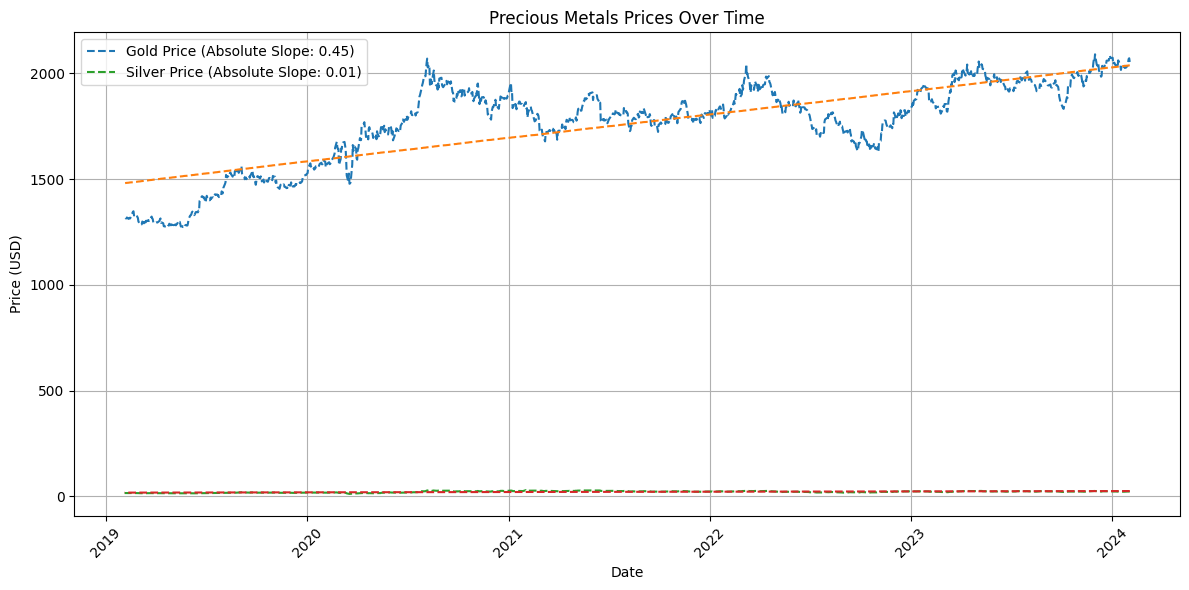

In [6]:
#Precious Metals Prices Over Time with linear regression
#Preparing data
X = np.array(range(len(targeted_data))).reshape(-1, 1)  # Independent variable (Time)
gold_prices = targeted_data['Gold_Price'].values.reshape(-1, 1)  # Dependent variable (Gold Price)
silver_prices = targeted_data['Silver_Price'].values.reshape(-1, 1)  # Dependent variable (Silver Price)

#Linear Regression for Gold
gold_lr = LinearRegression()
gold_lr.fit(X, gold_prices)
gold_slope = abs(gold_lr.coef_[0][0])  # Absolute value of the slope
gold_y_pred = gold_lr.predict(X)

#Linear Regression for Silver
silver_lr = LinearRegression()
silver_lr.fit(X, silver_prices)
silver_slope = abs(silver_lr.coef_[0][0])  # Absolute value of the slope
silver_y_pred = silver_lr.predict(X)

#Plotting
plt.figure(figsize=(12, 6))
plt.plot(targeted_data['Date'], gold_prices, label=f'Gold Price (Absolute Slope: {gold_slope:.2f})', linestyle='--')
plt.plot(targeted_data['Date'], gold_y_pred, linestyle='--')  # Plotting the line of best fit for gold
plt.plot(targeted_data['Date'], silver_prices, label=f'Silver Price (Absolute Slope: {silver_slope:.2f})', linestyle='--')
plt.plot(targeted_data['Date'], silver_y_pred, linestyle='--')  # Plotting the line of best fit for silver

plt.title('Precious Metals Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)  
plt.legend()
plt.grid(True)
plt.tight_layout()  
plt.savefig('Sector_htmls/Images/metals_price_trendline.png')  
plt.show()

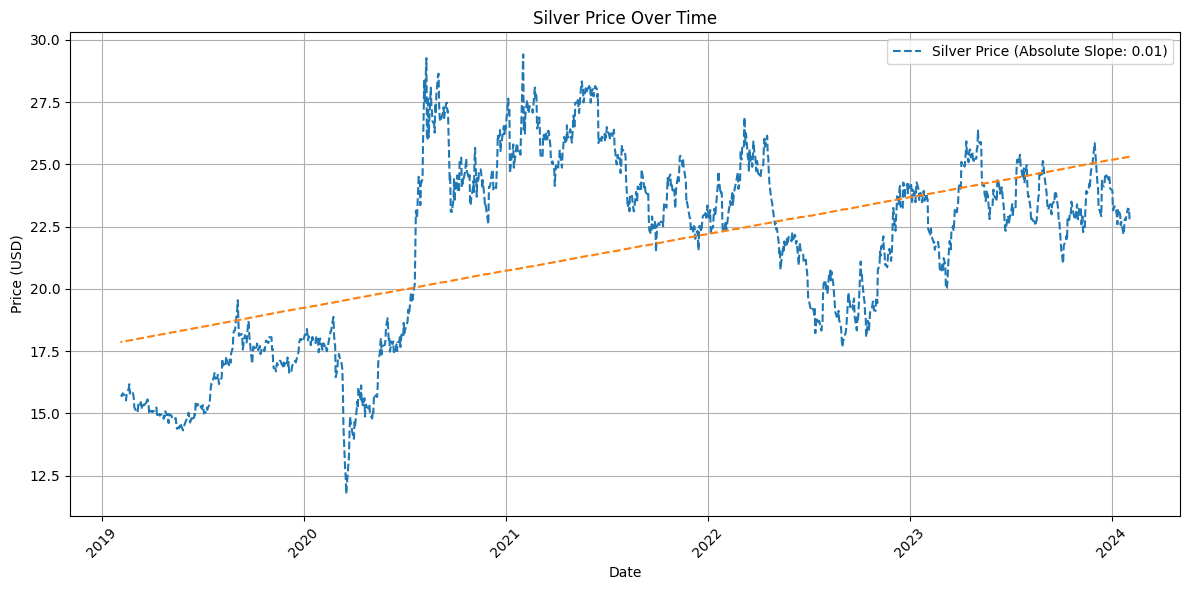

In [7]:
#doing only silver since it is too small to view
#Preparing data
X = np.array(range(len(targeted_data))).reshape(-1, 1)  # Independent variable (Time)
silver_prices = targeted_data['Silver_Price'].values.reshape(-1, 1)  # Dependent variable (Silver Price)

#Linear Regression for Silver
silver_lr = LinearRegression()
silver_lr.fit(X, silver_prices)
silver_slope = abs(silver_lr.coef_[0][0])  
silver_y_pred = silver_lr.predict(X)

#Plotting
plt.figure(figsize=(12, 6))
plt.plot(targeted_data['Date'], silver_prices, label=f'Silver Price (Absolute Slope: {silver_slope:.2f})', linestyle='--')
plt.plot(targeted_data['Date'], silver_y_pred, linestyle='--')  

plt.title('Silver Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Sector_htmls/Images/silver_price_trendline.png')
plt.show()

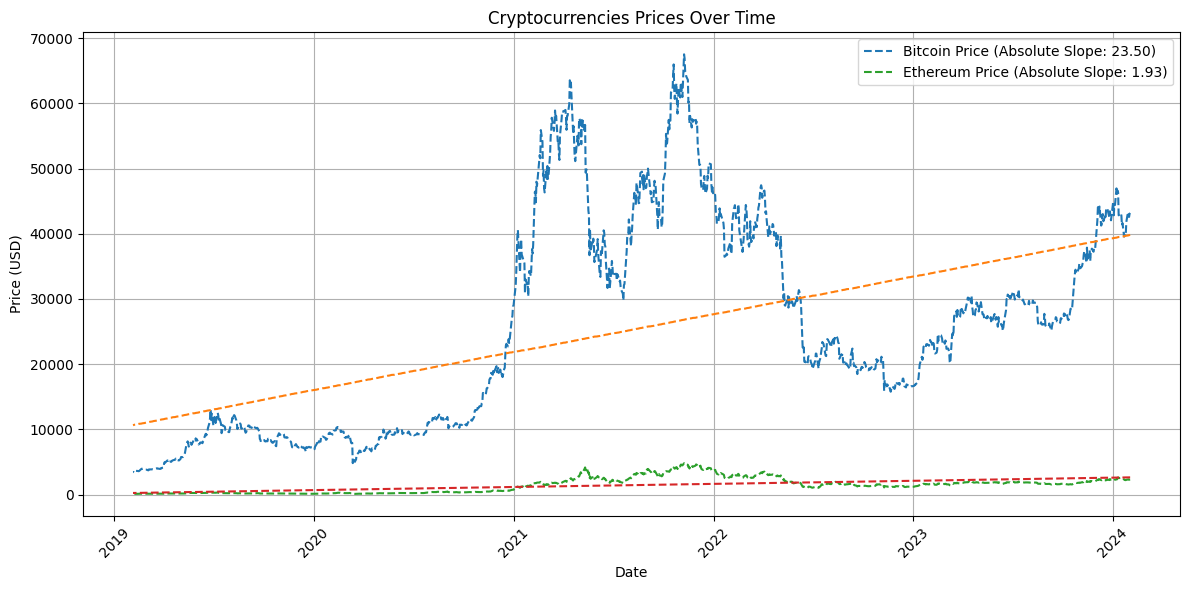

In [8]:
#Cryptocurrencies Prices Over Time graph with linear regression
#Independent variable (Time)
X = np.array(range(len(targeted_data))).reshape(-1, 1)

#Dependent variables (Bitcoin and Ethereum Prices)
bitcoin_prices = targeted_data['Bitcoin_Price'].values.reshape(-1, 1)
ethereum_prices = targeted_data['Ethereum_Price'].values.reshape(-1, 1)

#Linear Regression for Bitcoin
bitcoin_lr = LinearRegression()
bitcoin_lr.fit(X, bitcoin_prices)
bitcoin_slope = abs(bitcoin_lr.coef_[0][0])  
bitcoin_y_pred = bitcoin_lr.predict(X)

#Linear Regression for Ethereum
ethereum_lr = LinearRegression()
ethereum_lr.fit(X, ethereum_prices)
ethereum_slope = abs(ethereum_lr.coef_[0][0])  
ethereum_y_pred = ethereum_lr.predict(X)

#Plotting for Cryptocurrencies
plt.figure(figsize=(12, 6))
plt.plot(targeted_data['Date'], bitcoin_prices, label=f'Bitcoin Price (Absolute Slope: {bitcoin_slope:.2f})', linestyle='--')
plt.plot(targeted_data['Date'], bitcoin_y_pred, linestyle='--')
plt.plot(targeted_data['Date'], ethereum_prices, label=f'Ethereum Price (Absolute Slope: {ethereum_slope:.2f})', linestyle='--')
plt.plot(targeted_data['Date'], ethereum_y_pred, linestyle='--')

plt.title('Cryptocurrencies Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Sector_htmls/Images/cryptocurrencies_price_trendline.png')
plt.show()

Gold Volatility:  0.010118063526698817
Silver Volatility:  0.02063888447642368
Bitcoin Volatility:  0.045167735518564484
Ethereum Volatility:  0.057868790714531756


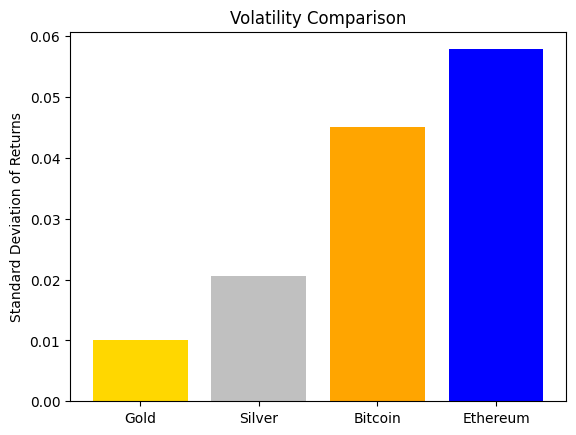

In [9]:
#Volatility Comparison between assests
#Calculate daily returns as percentage change
targeted_data['Gold_Returns'] = targeted_data['Gold_Price'].pct_change()
targeted_data['Silver_Returns'] = targeted_data['Silver_Price'].pct_change()
targeted_data['Bitcoin_Returns'] = targeted_data['Bitcoin_Price'].pct_change()
targeted_data['Ethereum_Returns'] = targeted_data['Ethereum_Price'].pct_change()

#Calculate standard deviation (volatility) of returns
gold_volatility = targeted_data['Gold_Returns'].std()
silver_volatility = targeted_data['Silver_Returns'].std()
bitcoin_volatility = targeted_data['Bitcoin_Returns'].std()
ethereum_volatility = targeted_data['Ethereum_Returns'].std()

#Print the volatility
print("Gold Volatility: ", gold_volatility)
print("Silver Volatility: ", silver_volatility)
print("Bitcoin Volatility: ", bitcoin_volatility)
print("Ethereum Volatility: ", ethereum_volatility)

#Plotting the standard deviation (volatility) of each asset
assets = ['Gold', 'Silver', 'Bitcoin', 'Ethereum']
volatilities = [gold_volatility, silver_volatility, bitcoin_volatility, ethereum_volatility]

plt.bar(assets, volatilities, color=['gold', 'silver', 'orange', 'blue'])
plt.title('Volatility Comparison')
plt.ylabel('Standard Deviation of Returns')
plt.savefig('Sector_htmls/Images/Volatility_Comparison.png')
plt.show()


# Analysis:
High volatility is often associated with higher risk. Since the asset's price can change rapidly, there's more uncertainty about its future value.

In [10]:
#Creating and displaying the new return on investments dataframe
#Convert 'Date' to datetime and sort the dataframe by date
targeted_data['Date'] = pd.to_datetime(targeted_data['Date'])
targeted_data.sort_values(by='Date', inplace=True)

#Function to calculate yearly ROI and format the result
def calculate_yearly_roi(df, price_column):
    yearly_roi = {}
    for year, group in df.groupby(df['Date'].dt.year):
        initial_price = group[price_column].iloc[0]
        final_price = group[price_column].iloc[-1]
        roi = (final_price - initial_price) / initial_price * 100
        yearly_roi[year] = round(roi, 2)
    return yearly_roi

#Calculate yearly ROI for each asset
gold_roi = calculate_yearly_roi(targeted_data, 'Gold_Price')
silver_roi = calculate_yearly_roi(targeted_data, 'Silver_Price')
bitcoin_roi = calculate_yearly_roi(targeted_data, 'Bitcoin_Price')
ethereum_roi = calculate_yearly_roi(targeted_data, 'Ethereum_Price')

#Create a new dataframe to display the ROI
roi_df = pd.DataFrame([gold_roi, silver_roi, bitcoin_roi, ethereum_roi], 
                      index=['Gold', 'Silver', 'Bitcoin', 'Ethereum']).T
roi_df

,Gold,Silver,Bitcoin,Ethereum
2019,15.45,12.81,107.82,19.75
2020,24.02,46.36,315.52,478.61
2021,-6.06,-14.66,44.33,252.83
2022,1.45,5.39,-64.23,-68.13
2023,12.23,-0.87,152.32,89.30
2024,-0.95,-4.83,-3.89,-1.95


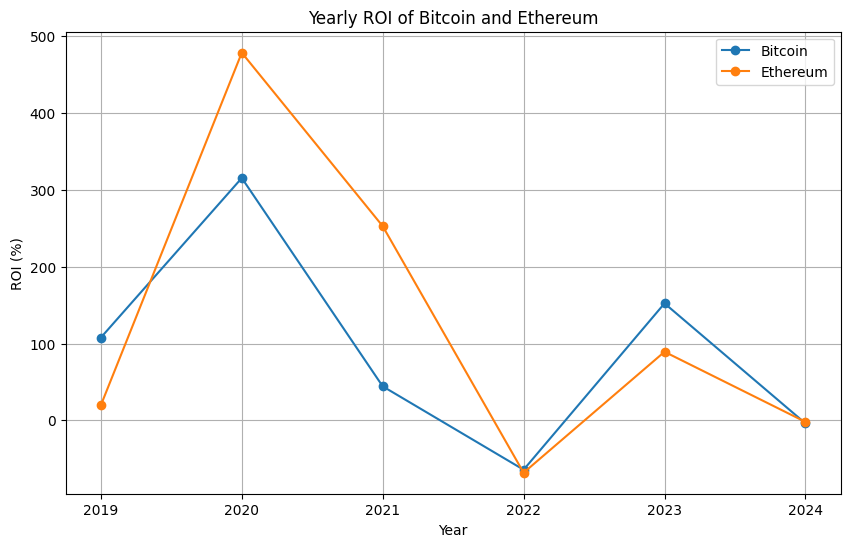

In [11]:
#Yearly ROI of Bitcoin and Ethereum line graph
data = {
    "Gold": {2019: 15.45, 2020: 24.02, 2021: -6.06, 2022: 1.45, 2023: 12.23, 2024: -0.95},
    "Silver": {2019: 12.81, 2020: 46.36, 2021: -14.66, 2022: 5.39, 2023: -0.87, 2024: -4.83},
    "Bitcoin": {2019: 107.82, 2020: 315.52, 2021: 44.33, 2022: -64.23, 2023: 152.32, 2024: -3.89},
    "Ethereum": {2019: 19.75, 2020: 478.61, 2021: 252.83, 2022: -68.13, 2023: 89.30, 2024: -1.95}
}
df = pd.DataFrame(data)

#Plotting the line chart for cryptocurrencies only
plt.figure(figsize=(10, 6))

#Looping through only Bitcoin and Ethereum
for column in ['Bitcoin', 'Ethereum']:
    plt.plot(df.index, df[column], marker='o', label=column)

plt.title('Yearly ROI of Bitcoin and Ethereum')
plt.xlabel('Year')
plt.ylabel('ROI (%)')
plt.legend()
plt.grid(True)

#Save the figure in the specified subfolder
plt.savefig('Sector_htmls/Images/ROI_Comparison_Cryptocurrencies.png')

#Now display the plot
plt.show()

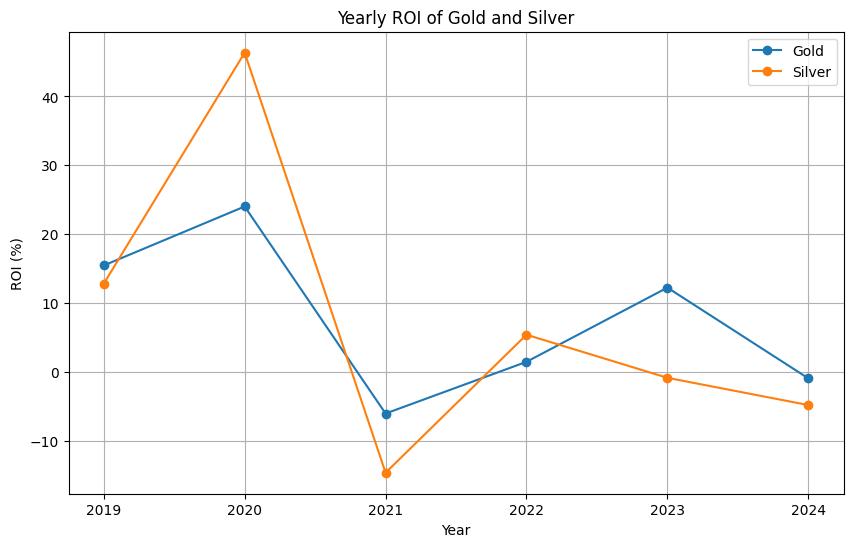

In [12]:
#Yearly ROI of Gold and Silver line graph
data = {
    "Gold": {2019: 15.45, 2020: 24.02, 2021: -6.06, 2022: 1.45, 2023: 12.23, 2024: -0.95},
    "Silver": {2019: 12.81, 2020: 46.36, 2021: -14.66, 2022: 5.39, 2023: -0.87, 2024: -4.83},
    "Bitcoin": {2019: 107.82, 2020: 315.52, 2021: 44.33, 2022: -64.23, 2023: 152.32, 2024: -3.89},
    "Ethereum": {2019: 19.75, 2020: 478.61, 2021: 252.83, 2022: -68.13, 2023: 89.30, 2024: -1.95}
}
df = pd.DataFrame(data)

#Plotting the line chart for precious metals only
plt.figure(figsize=(10, 6))

#Looping through only Gold and Silver
for column in ['Gold', 'Silver']:
    plt.plot(df.index, df[column], marker='o', label=column)

plt.title('Yearly ROI of Gold and Silver')
plt.xlabel('Year')
plt.ylabel('ROI (%)')
plt.legend()
plt.grid(True)

#Save the figure in the specified subfolder
plt.savefig('Sector_htmls/Images/ROI_Comparison_Precious_Metals.png')

#Now display the plot
plt.show()

In [13]:
#Gold ROI data plot html
gold_data = {2019: 15.45, 2020: 24.02, 2021: -6.06, 2022: 1.45, 2023: 12.23, 2024: -0.95}
df_gold = pd.Series(gold_data)

#Create the Plotly figure for Gold
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_gold.index, y=df_gold.values, mode='lines+markers', name='Gold',
                         hoverinfo='text',
                         text=[f"{year}: {value}%" for year, value in zip(df_gold.index, df_gold.values)]))

fig.update_layout(title='Yearly ROI of Gold',
                  xaxis_title='Year',
                  yaxis_title='ROI (%)',
                  hovermode='closest')

#Save the figure as HTML
fig.write_html('Sector_htmls/extra_htmls/gold_roi_plot.html')


In [14]:
#Bitcoin ROI data plot html
bitcoin_data = {2019: 107.82, 2020: 315.52, 2021: 44.33, 2022: -64.23, 2023: 152.32, 2024: -3.89}
df_bitcoin = pd.Series(bitcoin_data)

#Create the Plotly figure for Bitcoin
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_bitcoin.index, y=df_bitcoin.values, mode='lines+markers', name='Bitcoin',
                         hoverinfo='text',
                         text=[f"{year}: {value}%" for year, value in zip(df_bitcoin.index, df_bitcoin.values)]))

fig.update_layout(title='Yearly ROI of Bitcoin',
                  xaxis_title='Year',
                  yaxis_title='ROI (%)',
                  hovermode='closest')

#Save the figure as HTML
fig.write_html('Sector_htmls/extra_htmls/bitcoin_roi_plot.html')

In [15]:
#Ethereum ROI data plot html
ethereum_data = {2019: 19.75, 2020: 478.61, 2021: 252.83, 2022: -68.13, 2023: 89.30, 2024: -1.95}
df_ethereum = pd.Series(ethereum_data)

#Create the Plotly figure for Ethereum
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_ethereum.index, y=df_ethereum.values, mode='lines+markers', name='Ethereum',
                         hoverinfo='text',
                         text=[f"{year}: {value}%" for year, value in zip(df_ethereum.index, df_ethereum.values)]))

fig.update_layout(title='Yearly ROI of Ethereum',
                  xaxis_title='Year',
                  yaxis_title='ROI (%)',
                  hovermode='closest')

#Save the figure as HTML
fig.write_html('Sector_htmls/extra_htmls/ethereum_roi_plot.html')

In [16]:
#Silver ROI data plot html
silver_data = {2019: 12.81, 2020: 46.36, 2021: -14.66, 2022: 5.39, 2023: -0.87, 2024: -4.83}
df_silver = pd.Series(silver_data)

#Create the Plotly figure for Silver
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_silver.index, y=df_silver.values, mode='lines+markers', name='Silver',
                         hoverinfo='text',
                         text=[f"{year}: {value}%" for year, value in zip(df_silver.index, df_silver.values)]))

fig.update_layout(title='Yearly ROI of Silver',
                  xaxis_title='Year',
                  yaxis_title='ROI (%)',
                  hovermode='closest')

#Save the figure as HTML
fig.write_html('Sector_htmls/extra_htmls/silver_roi_plot.html')

In [17]:
#significant difference between Gold and Silver ROIs t-test
data = {
    "Gold": {2019: 15.45, 2020: 24.02, 2021: -6.06, 2022: 1.45, 2023: 12.23, 2024: -0.95},
    "Silver": {2019: 12.81, 2020: 46.36, 2021: -14.66, 2022: 5.39, 2023: -0.87, 2024: -4.83}
}
df = pd.DataFrame(data)

#Perform the independent two-sample t-test
t_stat, p_value = stats.ttest_ind(df['Gold'], df['Silver'])

print("T-Statistic:", t_stat)
print("P-value:", p_value)

T-Statistic: 0.03285244981065316
P-value: 0.9744387303995004


In [18]:
#significant difference between Bitcoin and Ethereum ROIs t-test
data2 = {
    "Bitcoin": {2019: 107.82, 2020: 315.52, 2021: 44.33, 2022: -64.23, 2023: 152.32, 2024: -3.89},
    "Ethereum": {2019: 19.75, 2020: 478.61, 2021: 252.83, 2022: -68.13, 2023: 89.30, 2024: -1.95}
}
df2 = pd.DataFrame(data2)

#Perform the independent two-sample t-test
t_stat, p_value = stats.ttest_ind(df2['Bitcoin'], df2['Ethereum'])

print("T-Statistic:", t_stat)
print("P-value:", p_value)

T-Statistic: -0.3661892709339052
P-value: 0.7218522874886493


# Analysis 2:
The P-value is 0.9744, which is much higher significance level than 0.05. This means that there is no sufficient evidence to reject the null hypothesis. Therefore, based on this test, there is no statistically significant difference in the mean ROI of gold and silver. This suggests that, given the data, the average ROI of gold and silver could be considered statistically similar. Similarly there is no significant difference between the mean ROI of Bitcoin and Ethereum.